In [1]:
import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from sod.jupyter.share import * # our user defined functions
# Print a nice doc of the module functions just imported (`printdoc` is defined in `share`)
printdoc()

join,"Join two or more pathname components, inserting '/' as needed"
abspath,Return an absolute path.
dirname,Returns the directory component of a pathname
isfile,Test whether a path is a regular file
isdir,Return true if the pathname refers to an existing directory.
sys,This module provides access to some objects used or maintained by the
os,OS routines for NT or Posix depending on what system we're on
re,Support for regular expressions (RE)
time,This module provides various functions to manipulate time values
inspect,Get useful information from live Python objects
datetime,"datetime(year, month, day[, hour[, minute[, second[, microsecond[,tzinfo]]]]])"


In [15]:
# matplotlib stuff. Note that rcParams need to be input from the second cell on
# (https://github.com/jupyter/notebook/issues/3385#issuecomment-376010658)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# for font size details, see https://stackoverflow.com/a/39566040
plt.rcParams['figure.figsize'] = (12, 12)
plt.rcParams['font.size'] = 15
plt.rcParams['axes.titlesize'] = plt.rcParams['font.size']
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.family'] = 'helvetica,arial'

# pandas settings. Some are set in `share`, display max_rows is explicitly set here
pd.set_option('display.max_rows', 20)

Loading classifiers

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=8192, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)
IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=8192, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)
IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=8192, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=2048, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)


,gain_factor,%outliers_detected
0,0.000100,100.000
1,0.000118,100.000
2,0.000138,100.000
3,0.000163,100.000
4,0.000192,100.000
5,0.000226,99.875
6,0.000266,96.350
7,0.000313,92.825
8,0.000368,89.275
9,0.000433,85.750


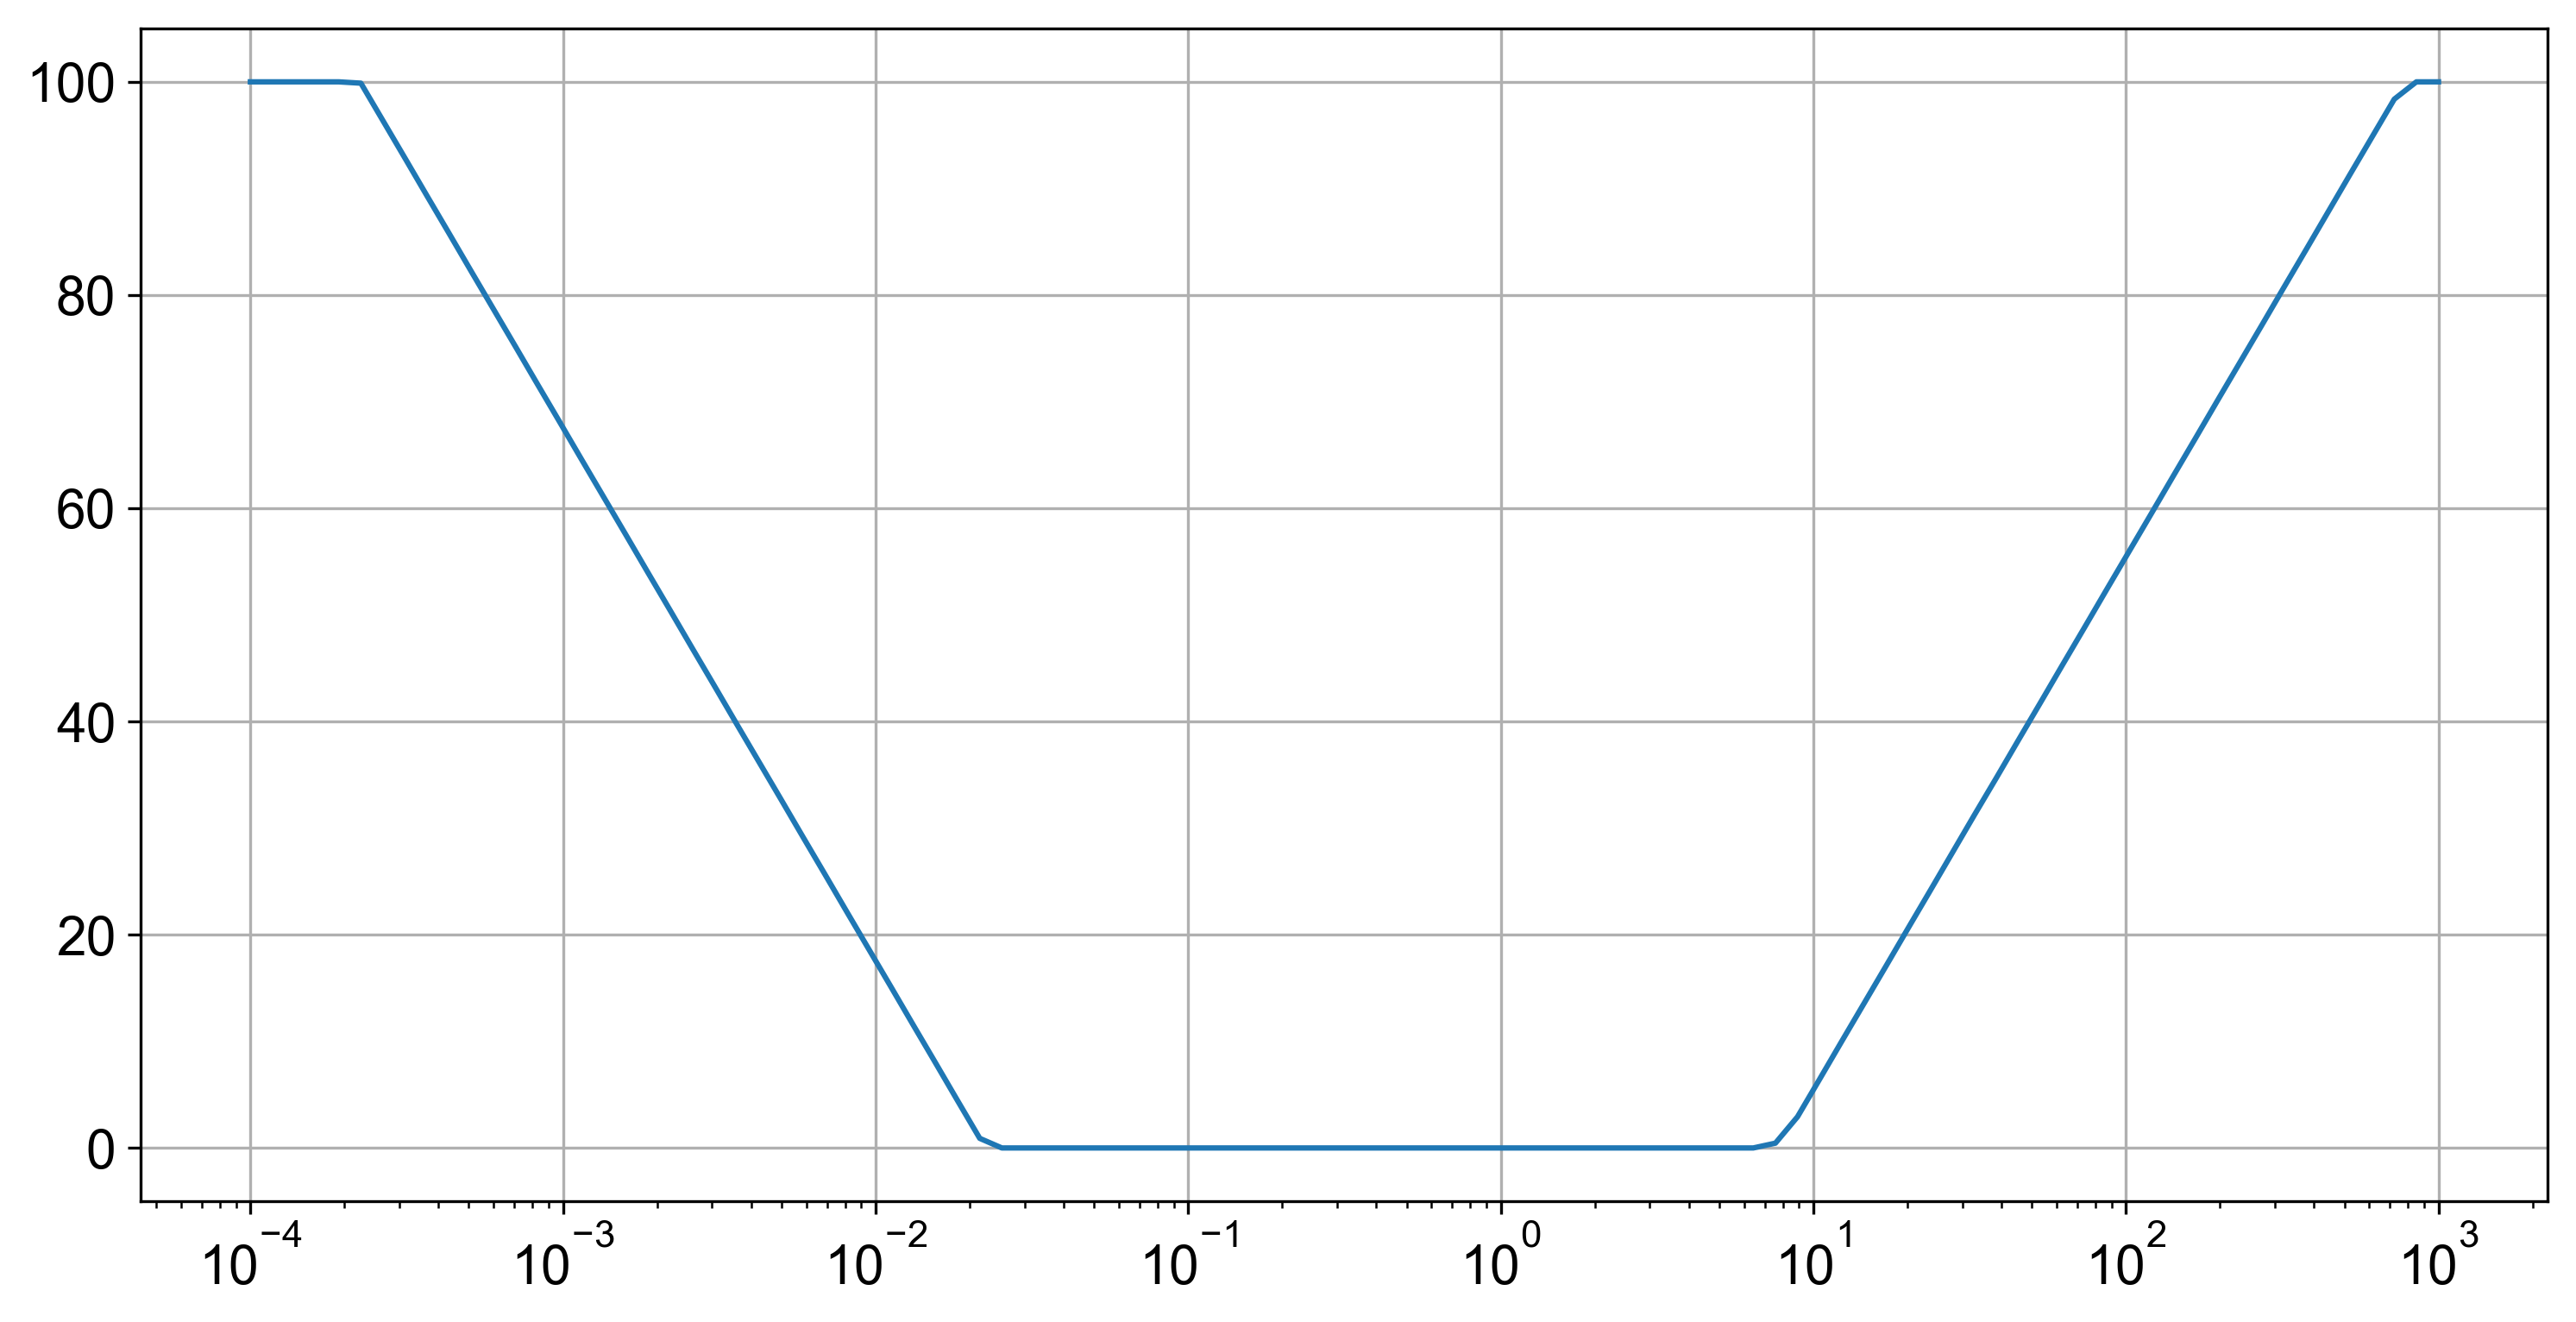


IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=4096, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)


,gain_factor,%outliers_detected
0,0.000100,100.000
1,0.000118,100.000
2,0.000138,100.000
3,0.000163,100.000
4,0.000192,100.000
5,0.000226,97.925
6,0.000266,94.375
7,0.000313,90.850
8,0.000368,87.300
9,0.000433,83.775


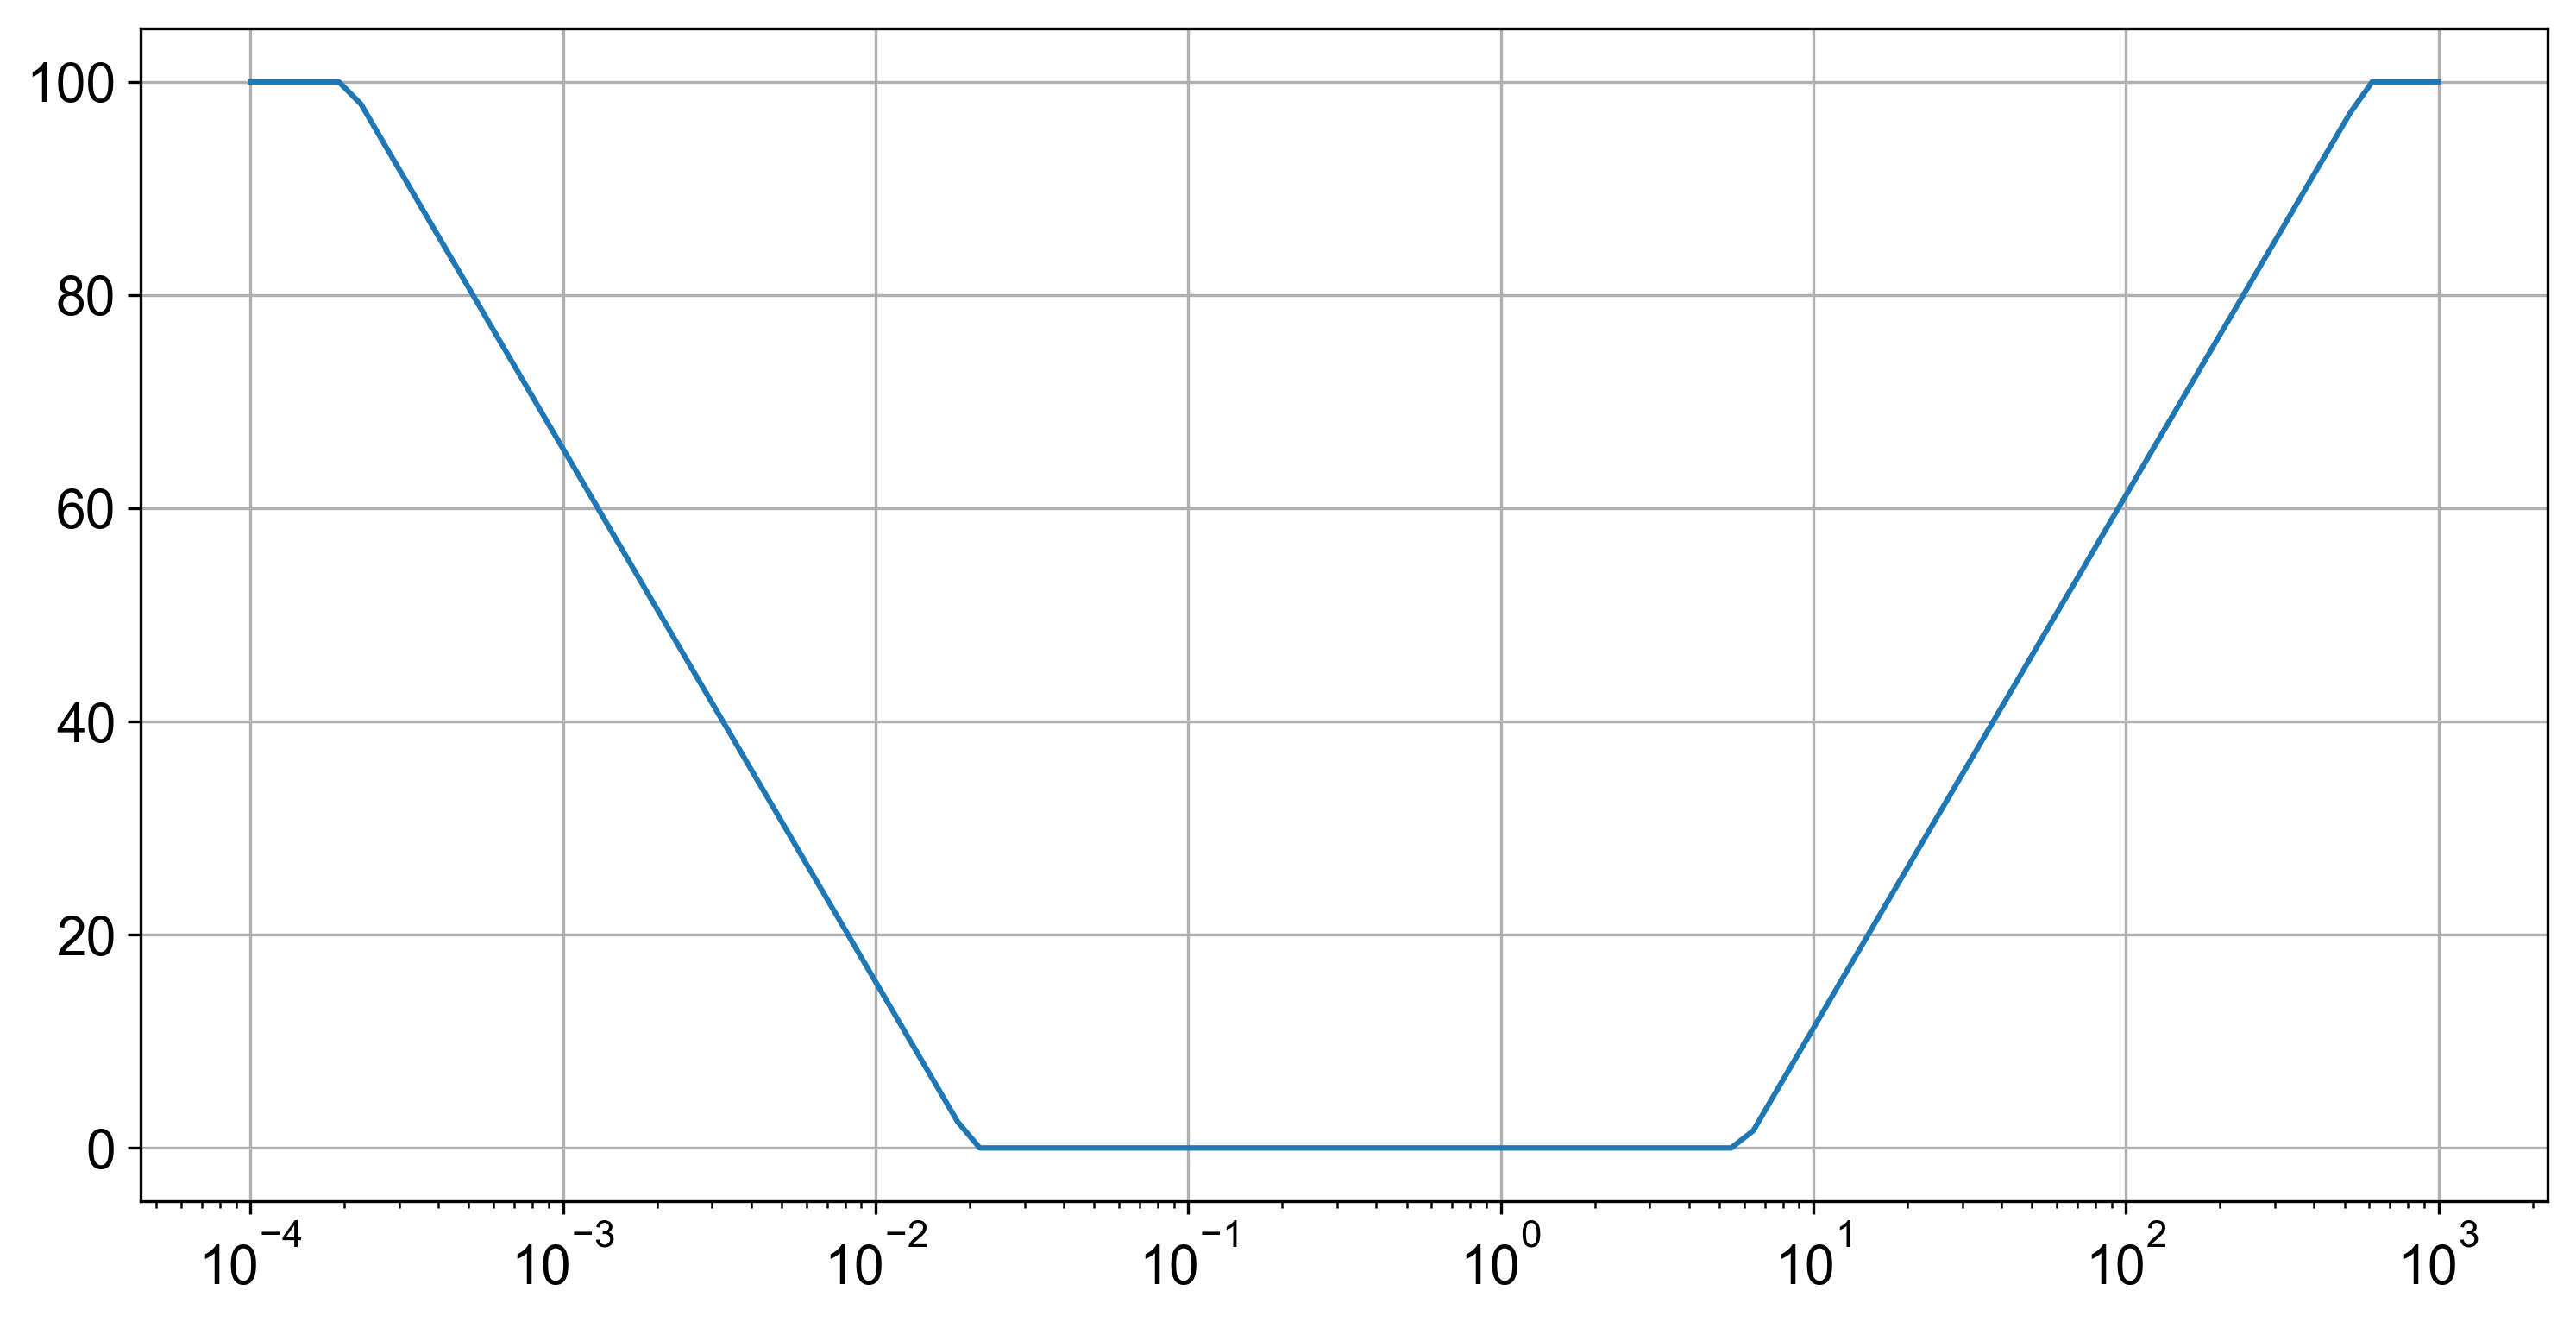


IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=8192, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)


,gain_factor,%outliers_detected
0,0.000100,100.000
1,0.000118,100.000
2,0.000138,100.000
3,0.000163,100.000
4,0.000192,100.000
5,0.000226,100.000
6,0.000266,96.550
7,0.000313,93.025
8,0.000368,89.475
9,0.000433,85.950


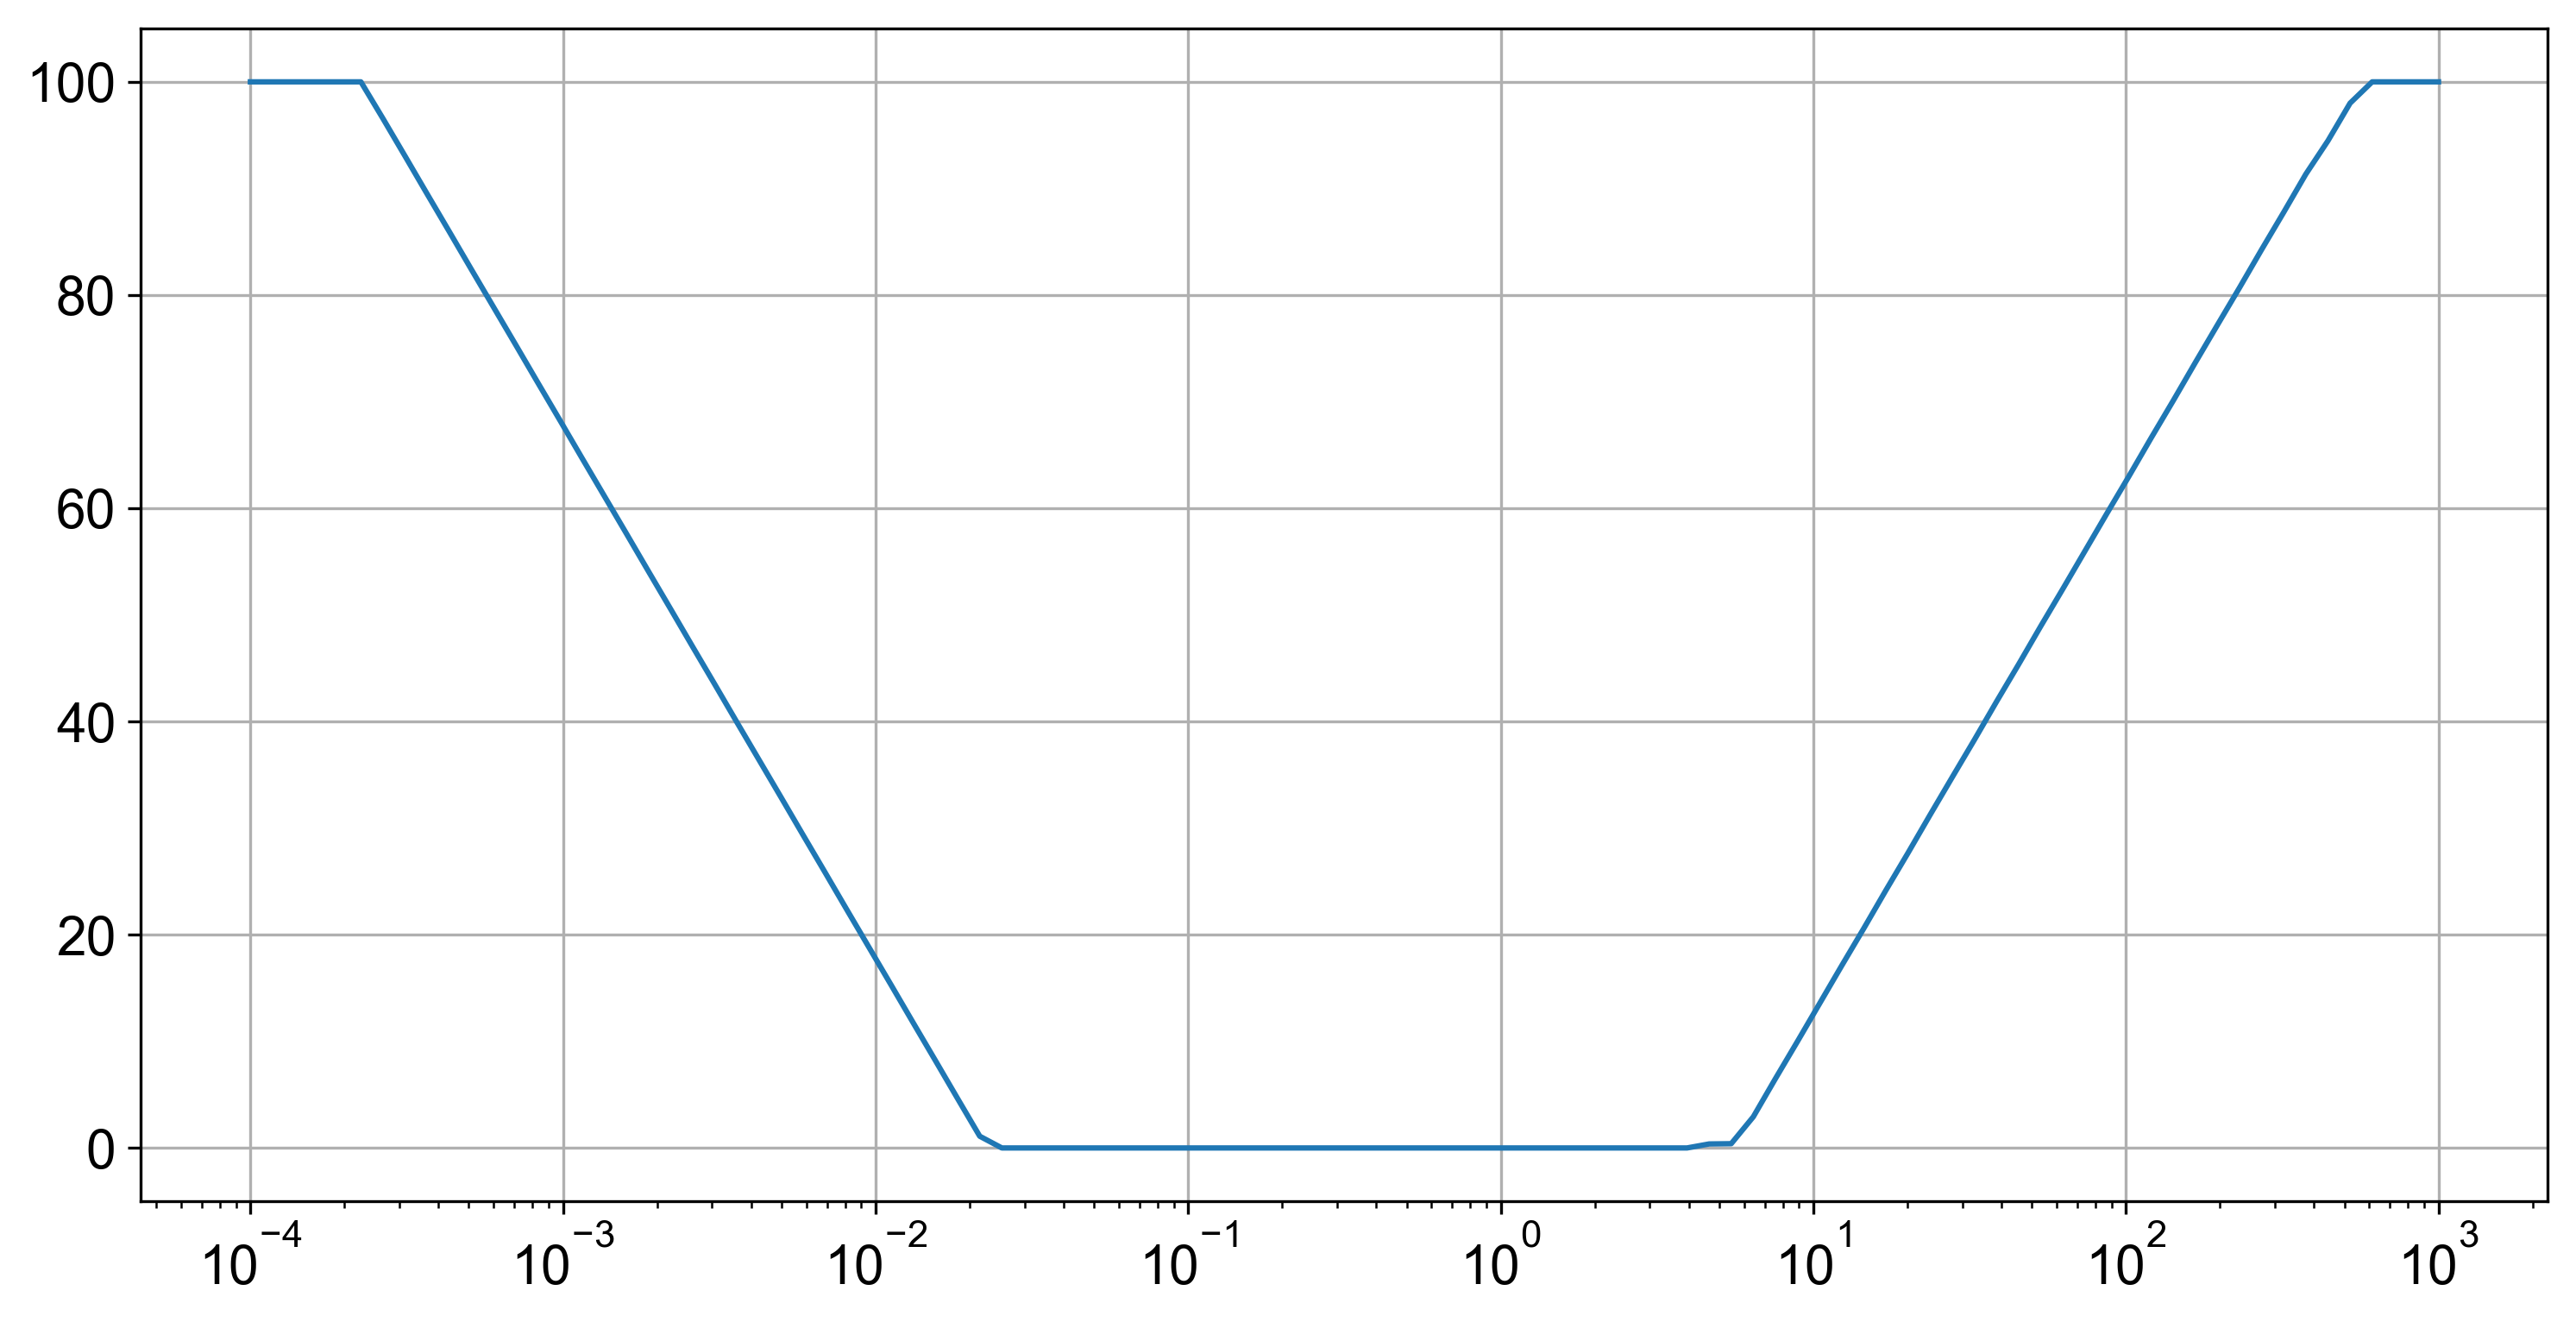

In [34]:
plt.rcParams['figure.figsize'] = (12, 6)
from scipy.interpolate import interp1d

clfnames = [
    'clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=2048&n_estimators=50&random_state=42.sklmodel',
    'clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=4096&n_estimators=50&random_state=42.sklmodel',
    'clf=IsolationForest&tr_set=allset_train.hdf&feats=psd@5sec&behaviour=new&contamination=auto&max_samples=8192&n_estimators=50&random_state=42.sklmodel'
]

thresholds = {
    clfnames[0]: 0.75,
    clfnames[1]: 0.72,
    clfnames[2]: 0.69
}
    
printhtml('<h3>Loading classifiers</h3>')
clfs = {_: load_clf(_) for _ in clfnames}
for clf in clfs.values():
    print(str(_))

values = np.arange(-140, -100, 0.01)

# factors = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
factors = np.logspace(-4, 3, 100, endpoint=True)

for clfname in clfnames:
    th = thresholds[clfname]
    clf = clfs[clfname]
    print()
    print(str(clf))
    oks = []
    for f in factors:
        vals = values - 10*np.log10(f**2)
        predictions = -clf.score_samples(vals.reshape(len(vals), 1))
        correctly_predicted = float((predictions>=th).sum())
        correctly_predicted_ratio = float(correctly_predicted) / float(len(predictions))
        oks.append(np.around(100*correctly_predicted_ratio, 4))
    display(pd.DataFrame({'gain_factor': factors, '%outliers_detected': oks}))
    plt.semilogx(factors, oks)
    # plt.semilogx(interpx, interp1d(factors, oks)(interpx), marker='o')
    plt.grid()
    plt.show()


IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=2048, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=4096, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
                max_features=1.0, max_samples=8192, n_estimators=50,
                n_jobs=None, random_state=42, verbose=0, warm_start=False)


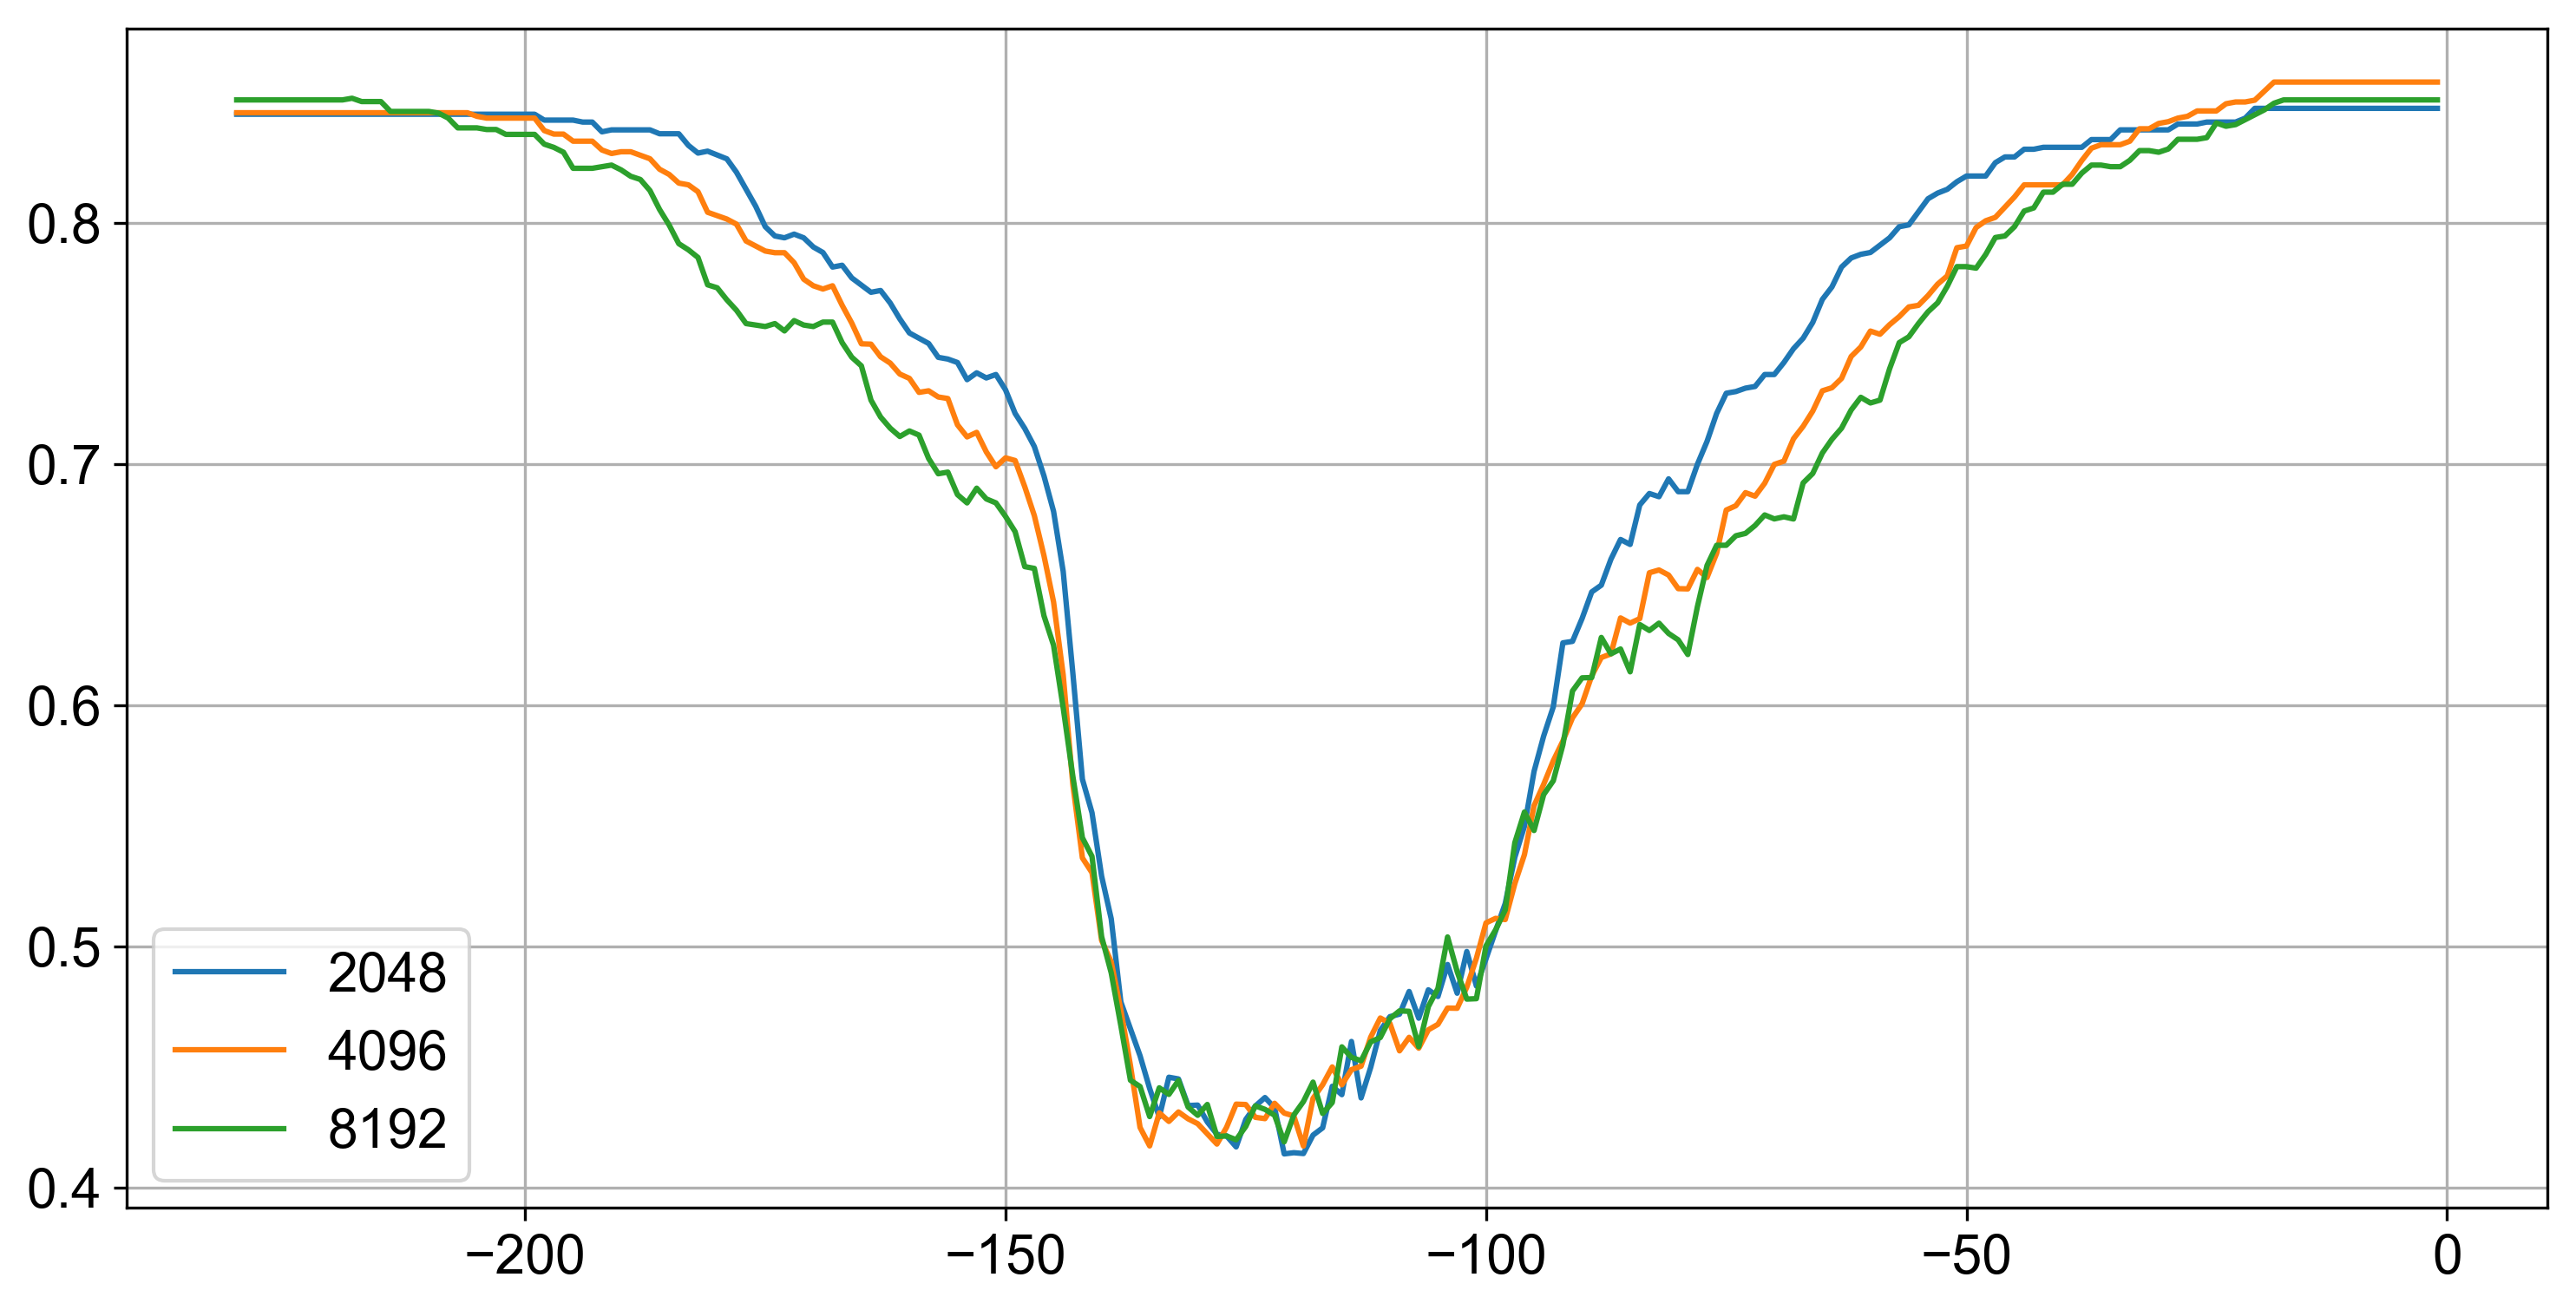

In [38]:
values = np.arange(-230, 0, 1)

# factors = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# factors = np.logspace(-4, 3, 100, endpoint=True)

for clfname in clfnames:
    th = thresholds[clfname]
    clf = clfs[clfname]
    print()
    # print(str(clf))
    predictions = -clf.score_samples(values.reshape(len(values), 1))
    plt.plot(values, predictions, label=clf.max_samples)
    # plt.semilogx(interpx, interp1d(factors, oks)(interpx), marker='o')
plt.grid()
plt.legend()
plt.show()

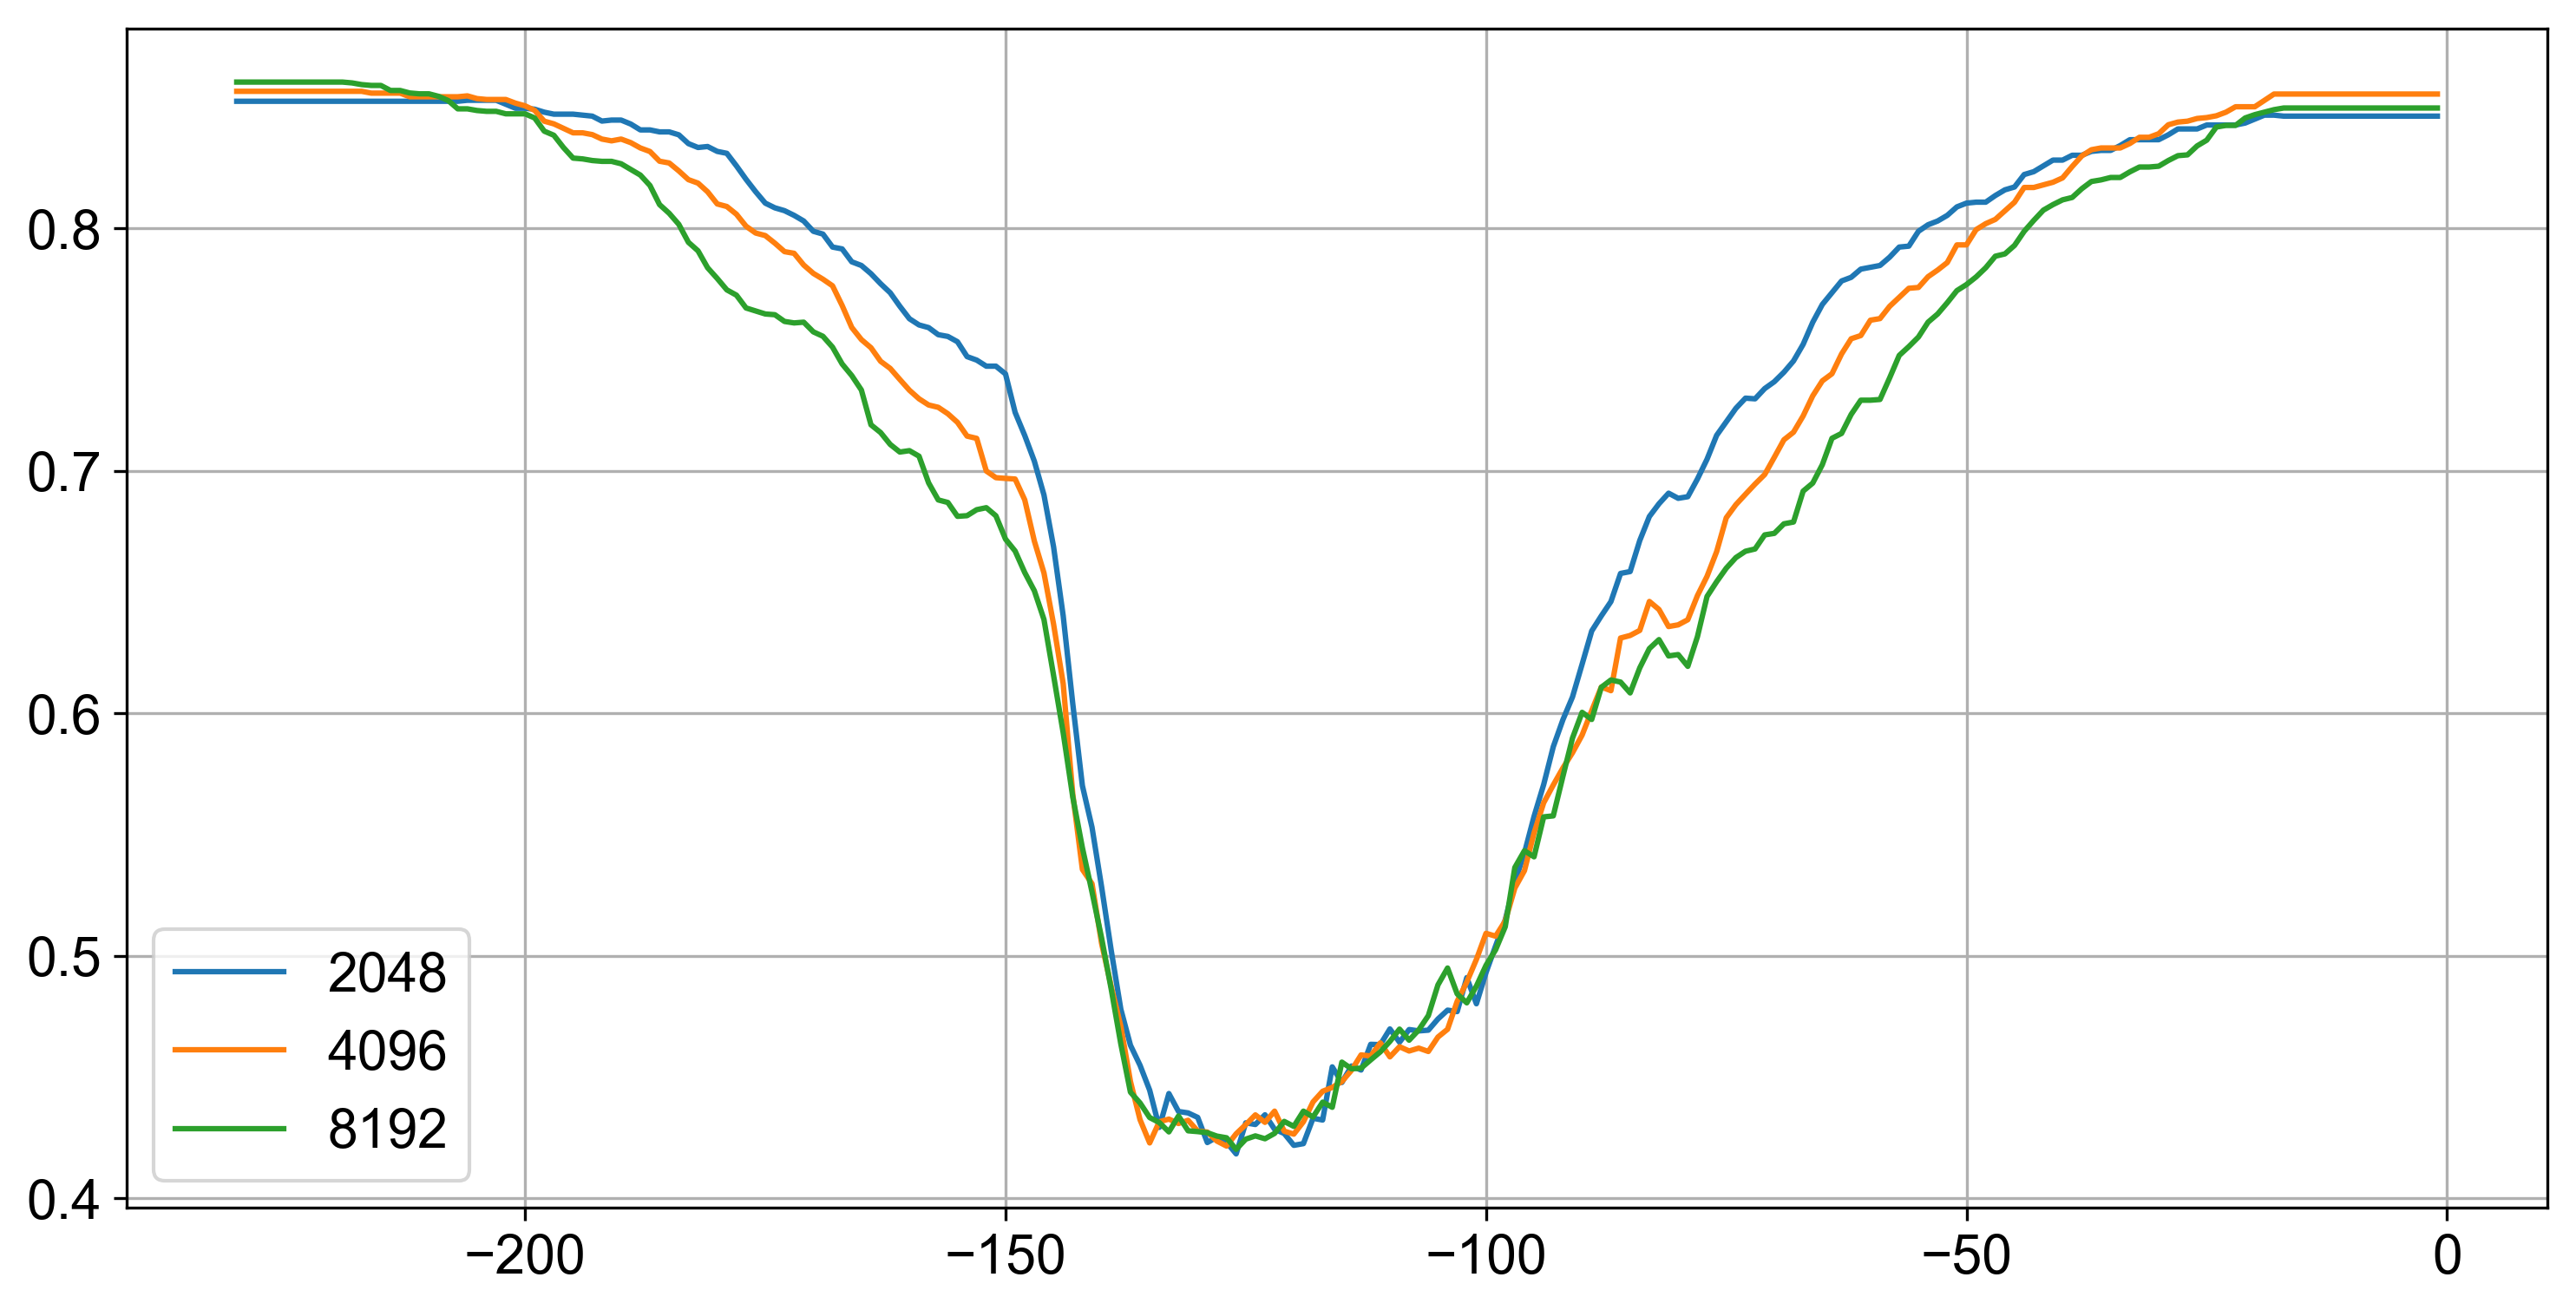

In [40]:
for clfname in clfnames:
    th = thresholds[clfname]
    clf = load_clf(clfname.replace('n_estimators=50', 'n_estimators=100'))
    print()
    # print(str(clf))
    predictions = -clf.score_samples(values.reshape(len(values), 1))
    plt.plot(values, predictions, label=clf.max_samples)
    # plt.semilogx(interpx, interp1d(factors, oks)(interpx), marker='o')
plt.grid()
plt.legend()
plt.show()

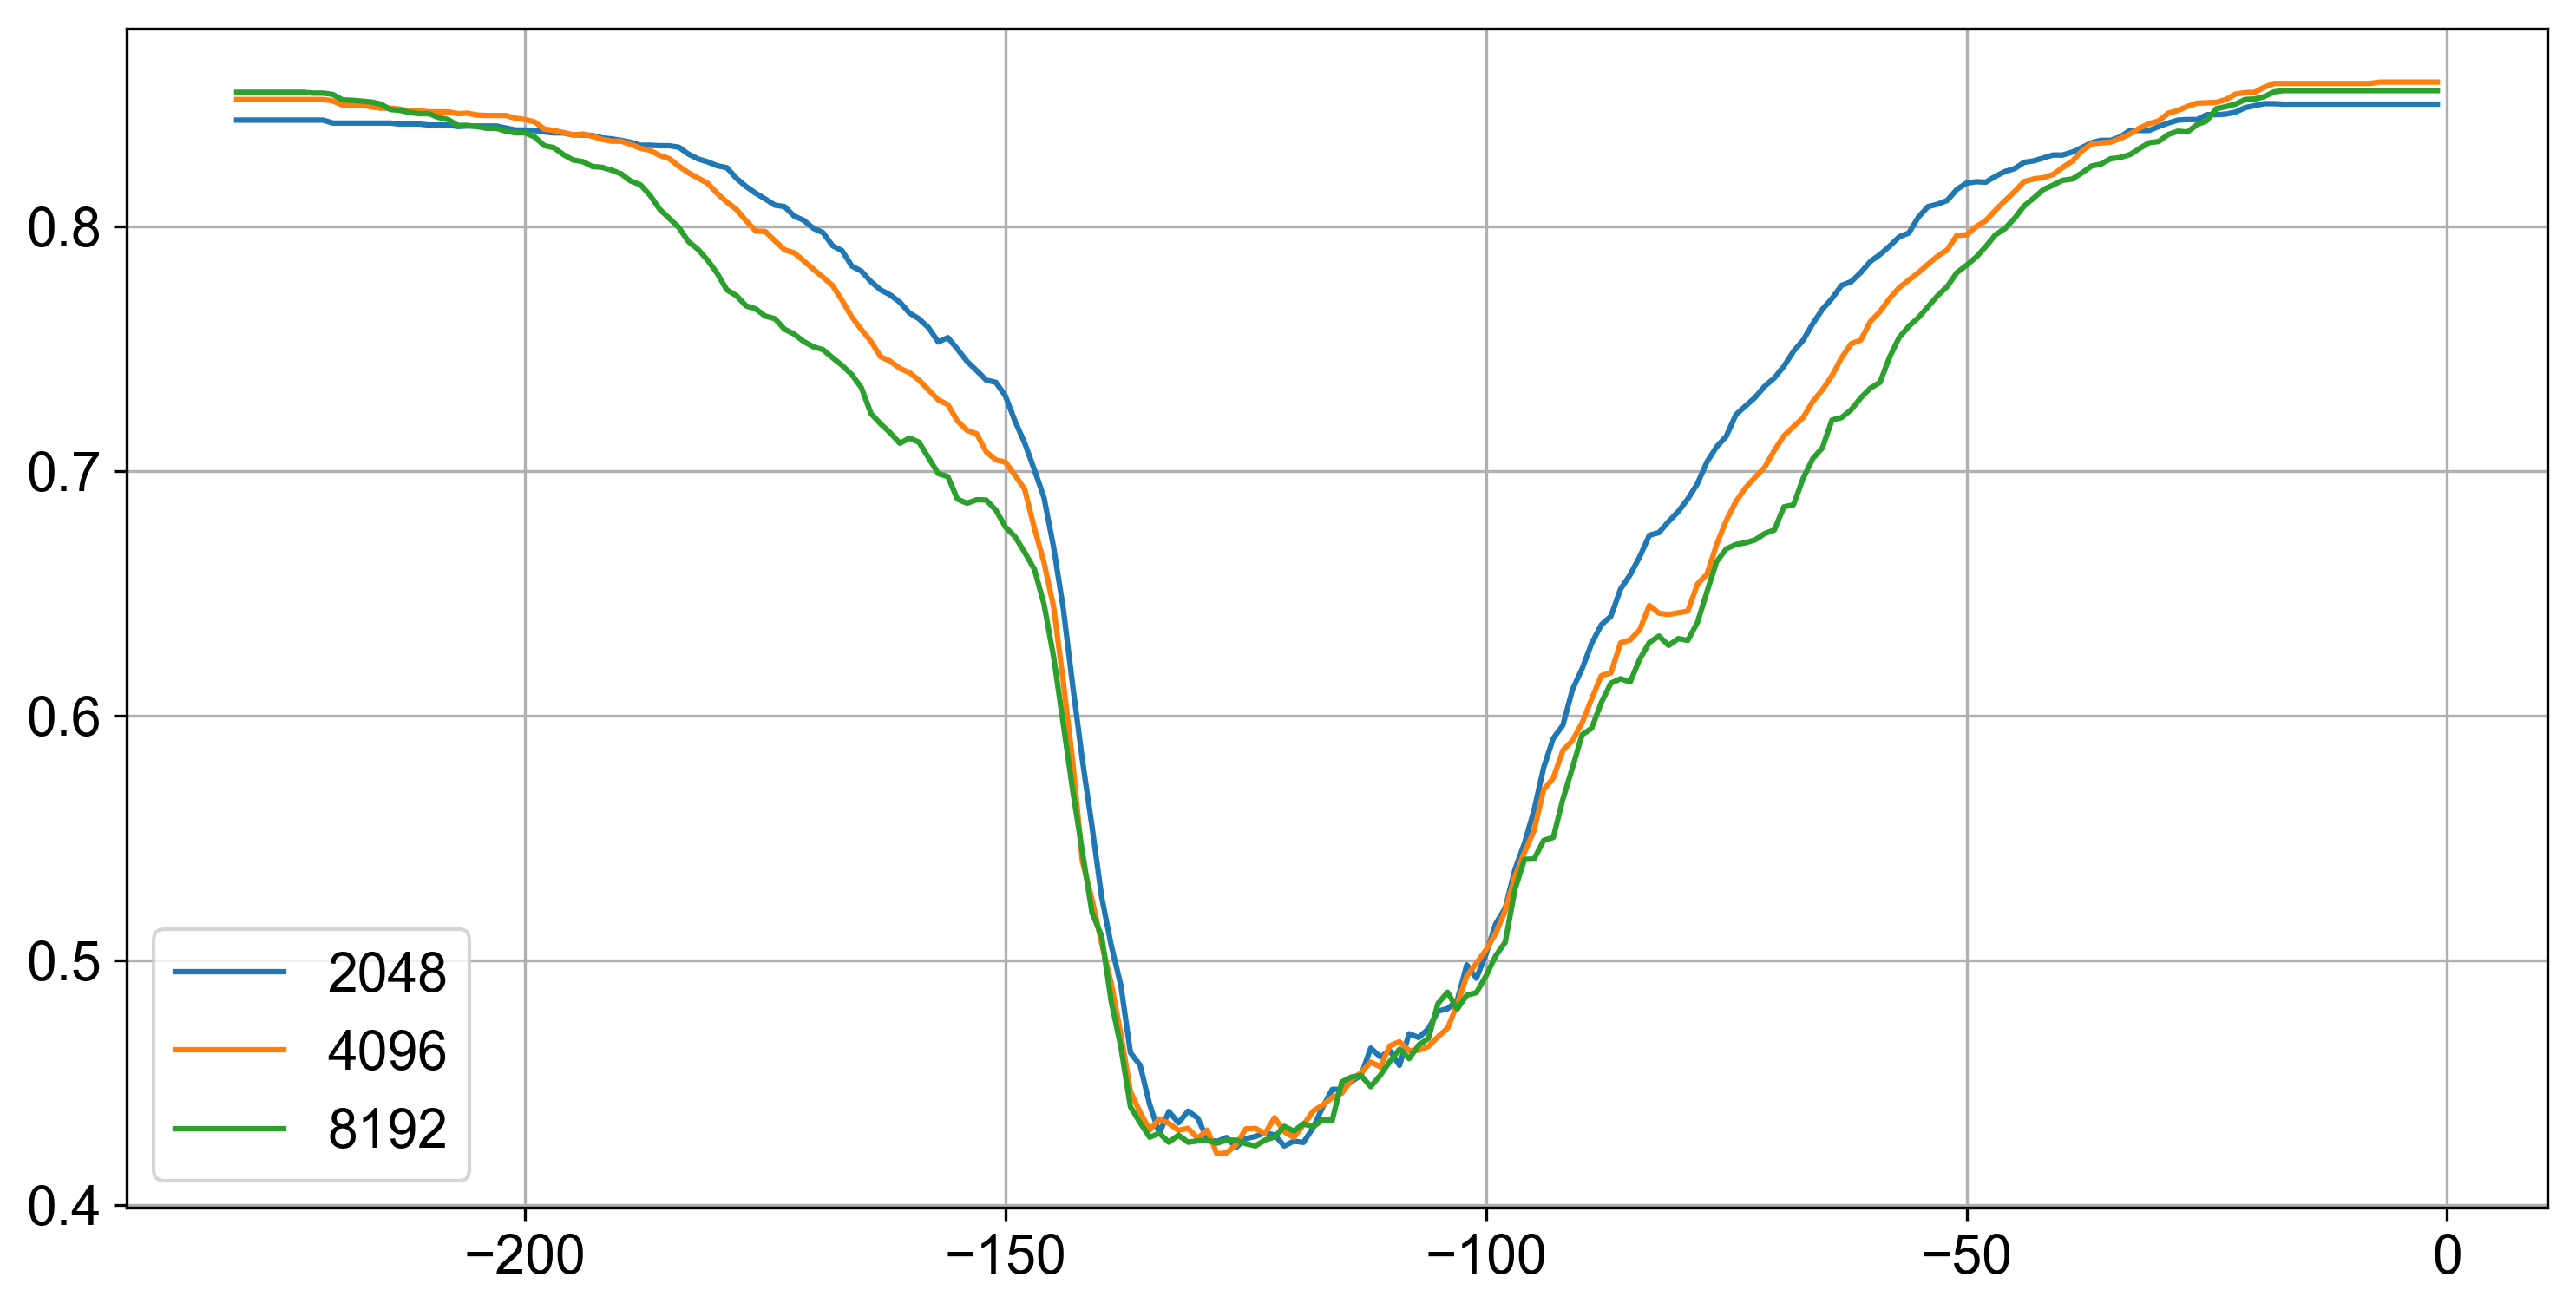

In [41]:
for clfname in clfnames:
    th = thresholds[clfname]
    clf = load_clf(clfname.replace('n_estimators=50', 'n_estimators=200'))
    print()
    # print(str(clf))
    predictions = -clf.score_samples(values.reshape(len(values), 1))
    plt.plot(values, predictions, label=clf.max_samples)
    # plt.semilogx(interpx, interp1d(factors, oks)(interpx), marker='o')
plt.grid()
plt.legend()
plt.show()